In [1]:
import sys
import pyart
import yaml
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from analysis import aname, bname

sys.path.append('../scripts')
import core


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

## Natural Motif (nat8a & nat8b) Statistics & Spectrograms

In [14]:
exp='nat8a'
dataset = 'alpha'
spectrograms = pd.read_csv(f"../build/{exp}/spectrograms.csv", index_col=[0,1])
stim_info = pd.read_csv(f"../inputs/stimuli/{exp}-info.csv")
motifs = stim_info.motif.unique()
gap_times = stim_info[stim_info.type=='gap'].groupby(['motif','gap']).first()[['gap_start', 'gap_stop']]
gap_times['interval'] = gap_times['gap_stop'] - gap_times['gap_start']

In [15]:
gap_times

gap_start  gap_stop  interval
motif gap                               
B189  1.0      113.0     209.0      96.0
      2.0      456.0     556.0     100.0
B2    1.0      748.0     824.0      76.0
      2.0      354.0     432.0      78.0
B30   1.0      329.0     402.0      73.0
      2.0      161.0     219.0      58.0
B72   1.0      608.0     670.0      62.0
      2.0      414.0     505.0      91.0
O129  1.0      372.0     465.0      93.0
      2.0      582.0     682.0     100.0
R180  1.0      328.0     428.0     100.0
      2.0      823.0     881.0      58.0
R253  1.0      512.0     612.0     100.0
      2.0      419.0     497.0      78.0
R56   1.0      629.0     729.0     100.0
      2.0      810.0     876.0      66.0

In [17]:
tmaxes = []

for m in motifs:
    stim = aname(m, 'C', 0)
    spec = spectrograms.loc[stim]
    tmax = spec.index.max()
    tmaxes.append(tmax)
print("Motif durations (ms): ", tmaxes)
print("Mean motif duration (ms): ", np.mean(tmaxes))
print("Std of motif durations (ms): ", np.std(tmaxes))

Motif durations (ms):  [837, 1087, 837, 1019, 951, 1155, 905, 1200]
Mean motif duration (ms):  998.875
Std of motif durations (ms):  130.6277511672003


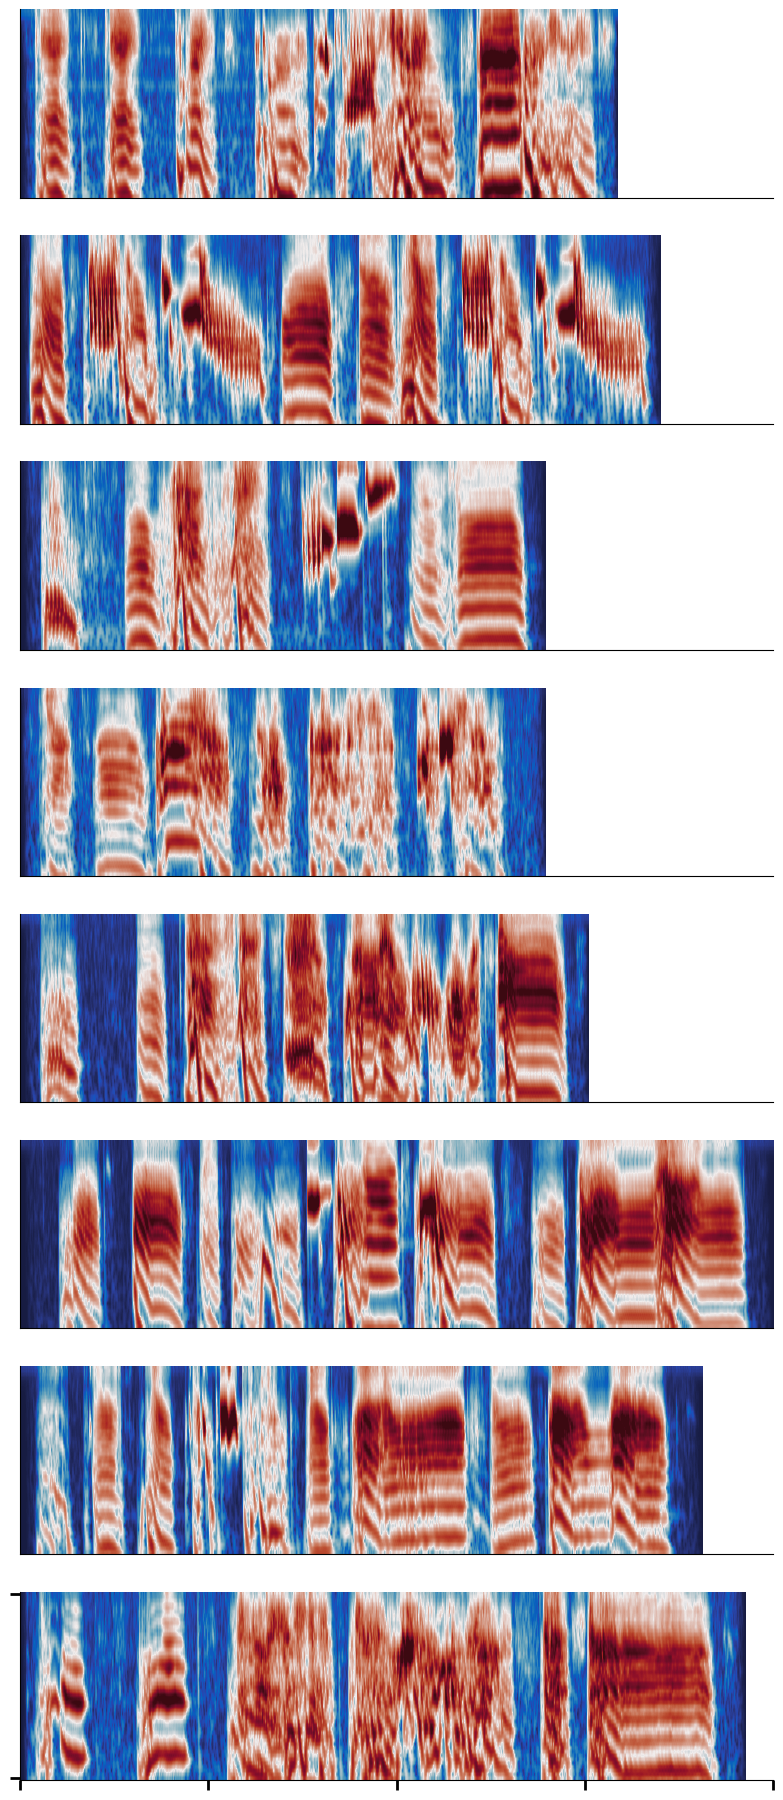

In [18]:
motifs = ['O129', 'B72', 'B30', 'B189', 'R253', 'R56', 'B2', 'R180']
fig, ax = plt.subplots(8,1, figsize=(10,23))

for im, m in enumerate(motifs):
    stim = aname(m, 'C', 0)
    spec = spectrograms.loc[stim]
    tmax = spec.index.max()
    ticks = np.arange(0,tmax, 300)
    ax[im].imshow(
        spec.T.iloc[::-1], cmap=cmap, aspect=6, vmin=0, vmax=3
    )
    ## Uncomment for highlighting of CIs
    # for g, row in gaptimes.loc[m].iterrows():
    #     ga, gb = row
    #     ax[im].fill_between([ga, gb], y1=0, y2=49, color='gold', alpha=0.3)
    sns.despine(ax=ax[im], top=True, right=True)
    if im==len(motifs)-1:
        ax[im].set_xticks([0,300,600,900,1200],[])
        ax[im].set_yticks([0,49], [])
    else:
        ax[im].set_xticks([])
        ax[im].set_yticks([])
    ax[im].set_xlim(0,1200)

## Synthetic Motif (synth8b) Statistics & Spectrograms

In [8]:
exp='synth8b'
spectrograms = pd.read_csv(f"../build/{exp}/spectrograms.csv", index_col=[0,1])
stim_info = pd.read_csv(f"../inputs/stimuli/{exp}-info.csv")
motifs = stim_info.motif.unique()
gap_times = stim_info[stim_info.type=='gap'].groupby(['motif','gap']).first()[['gap_start', 'gap_stop']]

tmaxes = []
for m in motifs:
    stim = bname(m, 'C', 0)
    spec = spectrograms.loc[stim]
    tmax = spec.index.max()
    tmaxes.append(tmax)
print("Motif durations (ms): ", tmaxes)
print("Mean motif duration (ms): ", np.mean(tmaxes))
print("Std of motif durations (ms): ", np.std(tmaxes))

[838, 890, 991, 970, 862, 975, 755, 1127]
926.0
106.85270235235045


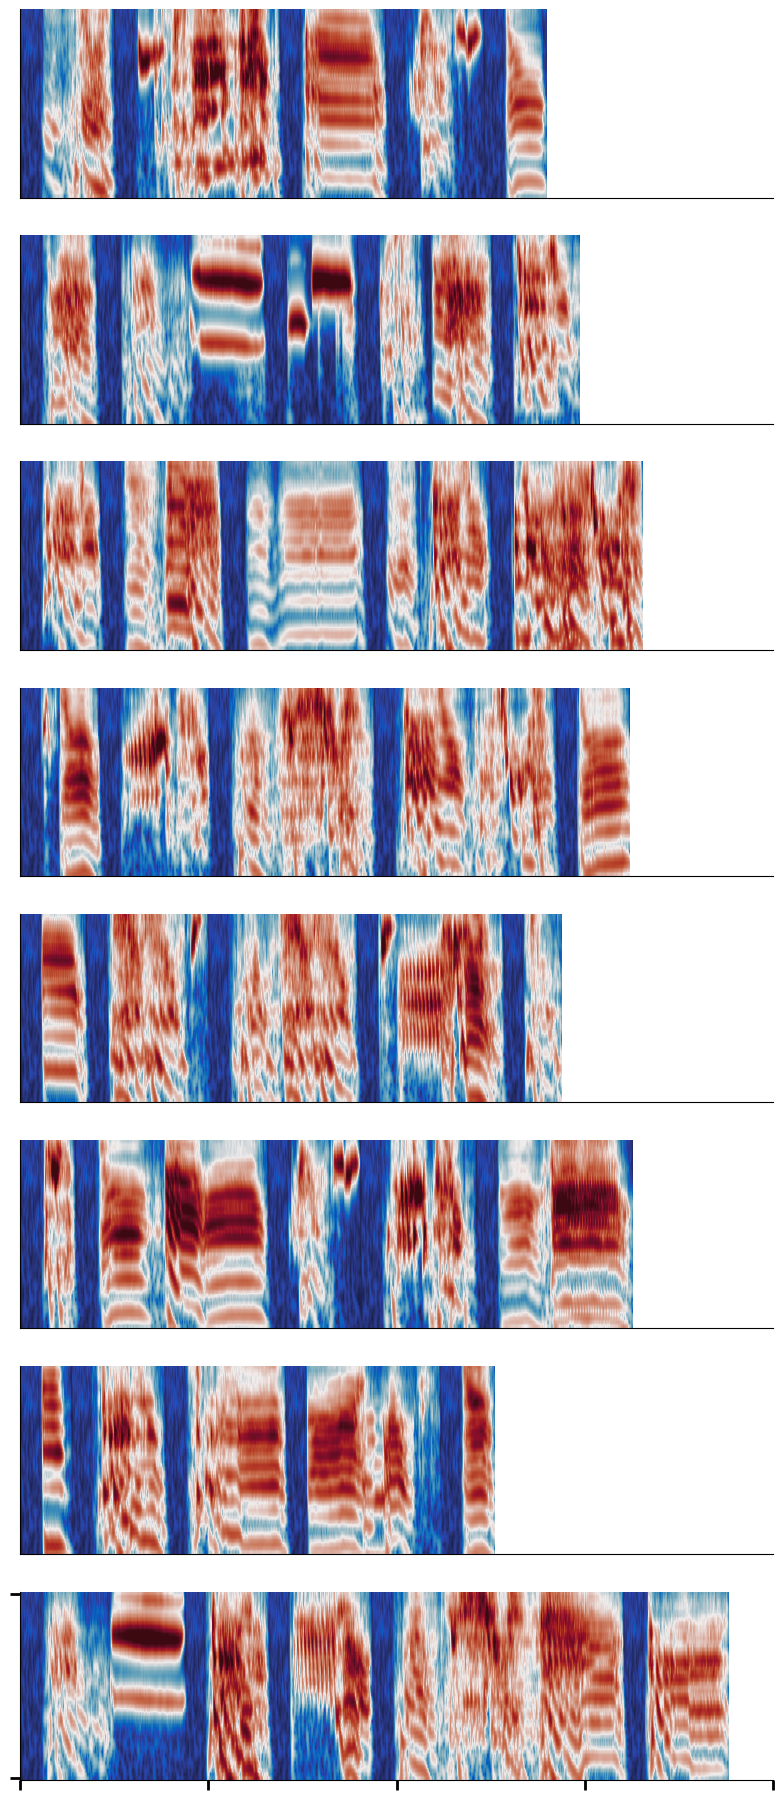

In [9]:
fig, ax = plt.subplots(8,1, figsize=(10,23))

for im, m in enumerate(motifs):
    stim = bname(m, 'C', 0)
    spec = spectrograms.loc[stim]
    tmax = spec.index.max()
    ticks = np.arange(0,tmax, 300)
    ax[im].imshow(
        spec.T.iloc[::-1], cmap=cmap, aspect=6, vmin=0, vmax=3
    )
    # for g, row in gaptimes.loc[m].iterrows():
    #     ga, gb = row
    #     ax[im].fill_between([ga, gb], y1=0, y2=49, color='gold', alpha=0.3)
    sns.despine(ax=ax[im], top=True, right=True)
    if im==len(motifs)-1:
        ax[im].set_xticks([0,300,600,900,1200],[])
        ax[im].set_yticks([0,49], [])
    else:
        ax[im].set_xticks([])
        ax[im].set_yticks([])
    ax[im].set_xlim(0,1200)